In [5]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
model = MobileNet(weights='imagenet')  # You can use MobileNetV2 if preferred


17225924/17225924 [==============================] - 3s 0us/step


In [ ]:
def prepare_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Preprocessing step to match ImageNet format
    return img_array


In [ ]:
def prepare_image(image_path):
    # Load image with the target size of (224, 224)
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Convert image to array
    img_array = img_to_array(img)
    
    # Add a batch dimension (the model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image as required by MobileNet (mean subtraction and scaling)
    img_array = preprocess_input(img_array)
    
    return img_array


In [ ]:
def prepare_image(image_path):
    # Load image with the target size of (224, 224)
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Convert image to array
    img_array = img_to_array(img)
    
    # Add a batch dimension (the model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image as required by MobileNet (mean subtraction and scaling)
    img_array = preprocess_input(img_array)
    
    return img_array


In [ ]:
# Load the image and prepare it
image_path = 'dog.jpeg'  # Replace with your image path
img = prepare_image(image_path)

# Predict the class probabilities for the image
preds = model.predict(img)


1/1 [==============================] - 0s 89ms/step


In [ ]:
# Decode the predictions (top 1 prediction)
from tensorflow.keras.applications.mobilenet import decode_predictions

decoded_preds = decode_predictions(preds, top=1)[0]

# Display the predicted label and its probability
print(f"Predicted label: {decoded_preds[0][1]} (Probability: {decoded_preds[0][2]:.2f})")


Predicted label: sports_car (Probability: 0.56)


1/1 [==============================] - 0s 90ms/step
Predicted label: pomegranate (Probability: 1.00)


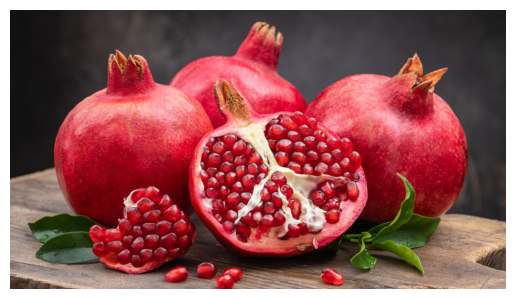

In [ ]:
image_path = "pomegranate.jpg"

# Prepare the image and make predictions
img = prepare_image(image_path)
preds = model.predict(img)  # Define preds here

# Decode predictions
decoded_preds = decode_predictions(preds, top=1)[0]
print(f"Predicted label: {decoded_preds[0][1]} (Probability: {decoded_preds[0][2]:.2f})")

# Display the image
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
def check_accuracy(image_path, true_label):
    # Prepare the image
    img = prepare_image(image_path)
    
    # Get predictions
    preds = model.predict(img)
    
    # Decode predictions to get the predicted class label
    decoded_preds = decode_predictions(preds, top=1)[0]
    predicted_label = decoded_preds[0][1]
    
    # Check if predicted label matches the true label
    accuracy = 1 if predicted_label == true_label else 0
    print(f"True label: {true_label}, Predicted label: {predicted_label}")
    print(f"Accuracy: {accuracy * 100}%")

# Example usage
check_accuracy('pomegranate.jpg', '')  # Replace 'tabby cat' with the true label


1/1 [==============================] - 0s 81ms/step
True label: , Predicted label: pomegranate
Accuracy: 0%
